## A. Import Libraries List

In [193]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [194]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from scipy import stats
from datetime import date
from datetime import datetime as dt
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
import time
from collections import defaultdict

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix, classification_report


pd.set_option('display.max_columns', None)

## B. Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut


In [195]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['axes.labelsize'] = 'x-large'

## C. Load Dataset

In [196]:
train = pd.read_csv('/content/gdrive/MyDrive/python dataset/application_train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/python dataset/application_test.csv')
display(train.head())
display('DATA TRAIN',train.shape, 'entries' )
print('                    ')
print('                    ')
display(test.head())
display('DATA TEST', test.shape, 'entries')


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

'DATA TRAIN'

(307511, 122)

'entries'

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

'DATA TEST'

(48744, 121)

'entries'

## D. Descriptive Statistics

In [197]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [198]:
# Informasi general tentang dataframe
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## **E. Statistical Summary**

In [199]:
# pengelompokan kolom berdasarkan jenisnya
train_num = train.select_dtypes(include = ['int64','float64'])
train_cat = train.select_dtypes(include = ['object'])

### **Numerical**

In [200]:
# ringkasan statistik dari kolom numerik
train_num.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

**Summary**:<br>
DAYS_BIRTH dan DAYS_EMPLOYED = Dalam bentuk negatif

### **Categorical**

In [201]:
#Nilai unik kolom kategorik
for i in train_cat:
    print('======'*4)
    print('jumlah unique value', i, ':', len(train[i].unique()))
    print('======'*4)
    print(train_cat[i].value_counts())
    print()

jumlah unique value NAME_CONTRACT_TYPE : 2
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

jumlah unique value CODE_GENDER : 3
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

jumlah unique value FLAG_OWN_CAR : 2
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

jumlah unique value FLAG_OWN_REALTY : 2
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

jumlah unique value NAME_TYPE_SUITE : 8
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

jumlah unique value NAME_INCOME_TYPE : 8
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME

In [202]:
# categorical columns 
train_cat.describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


# **F. DATA VISUALIZATION**

In [203]:
train_target1 = train[train['TARGET']==1]

In [204]:
train_target1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.306841,0.320163,0.1309,0.1250,0.9960,0.9456,0.0822,0.16,0.1379,0.2500,0.2917,0.0142,0.1059,0.1267,0.0039,0.0078,0.1334,0.1297,0.9960,0

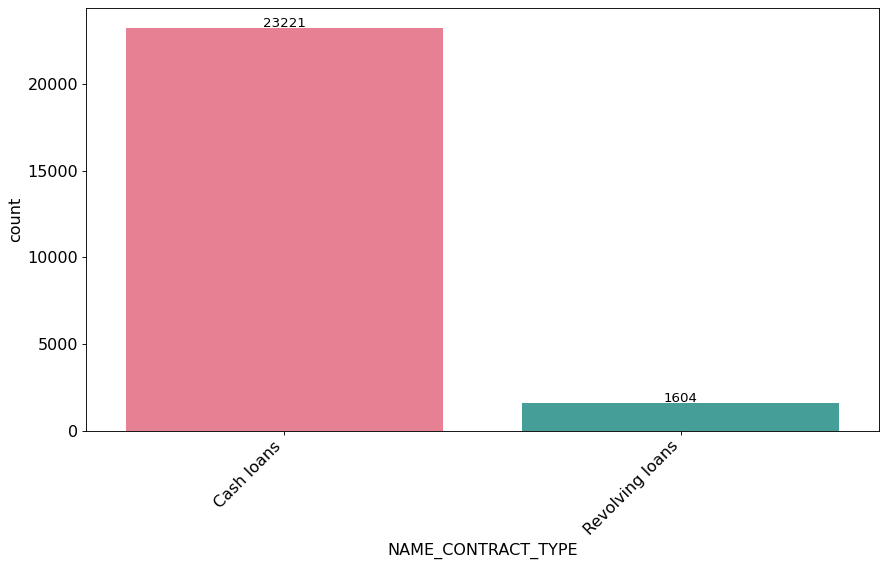

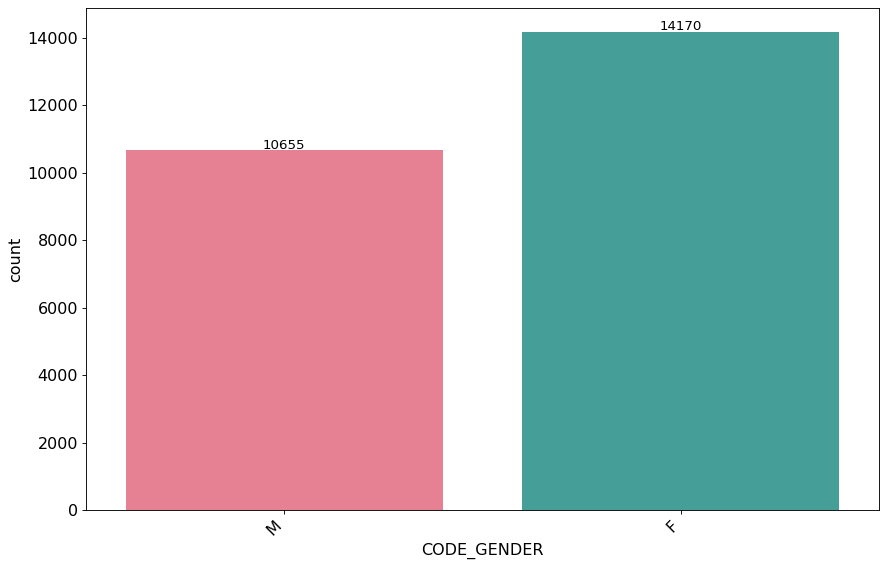

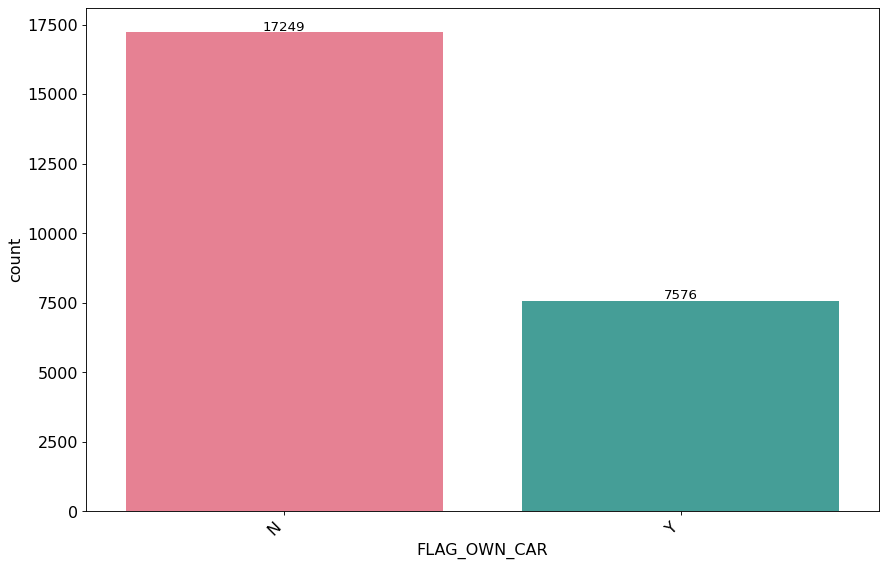

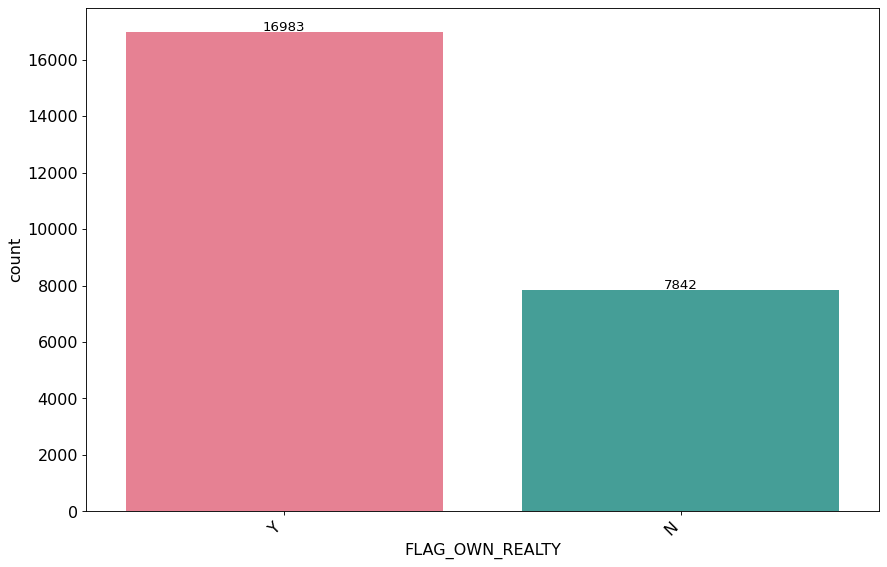

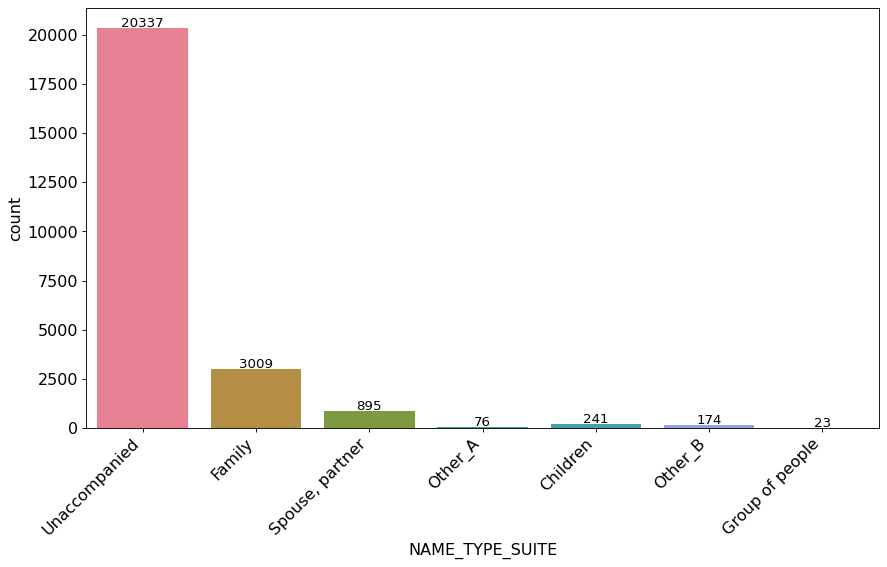

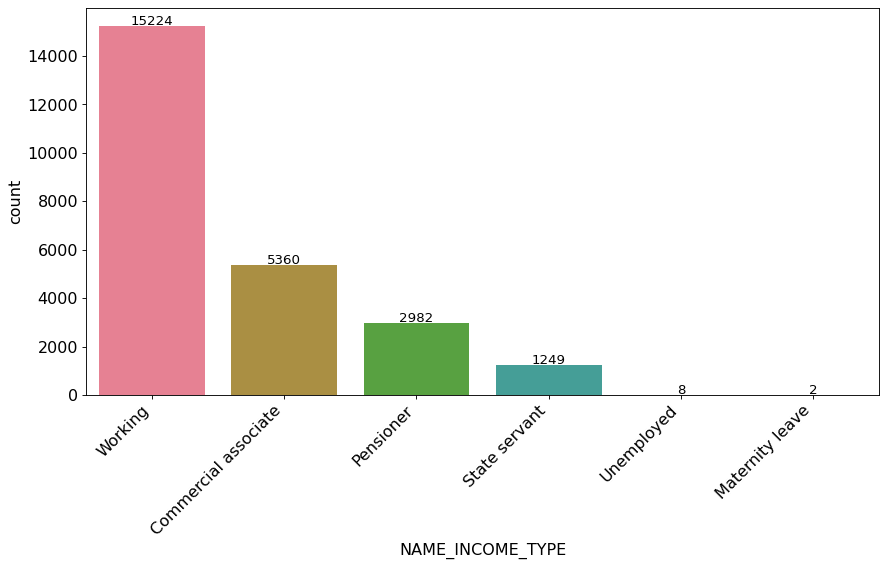

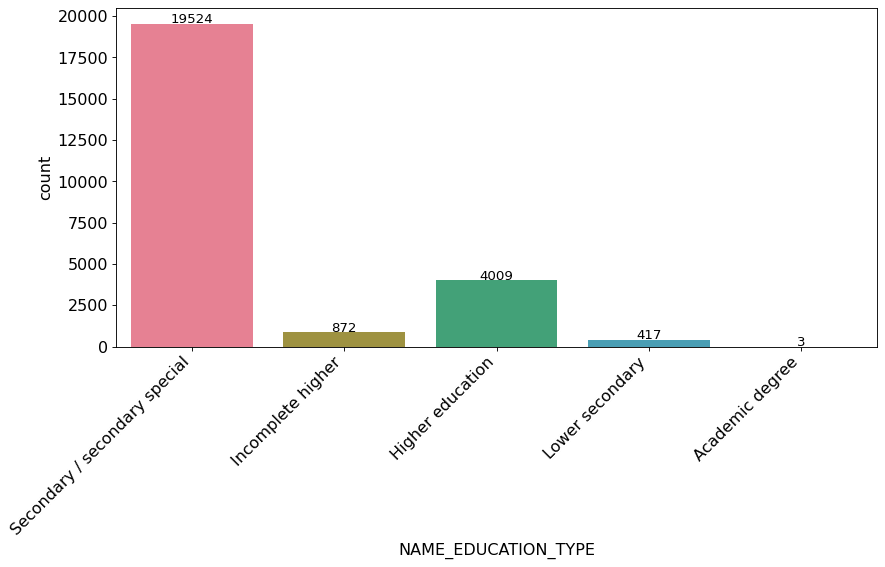

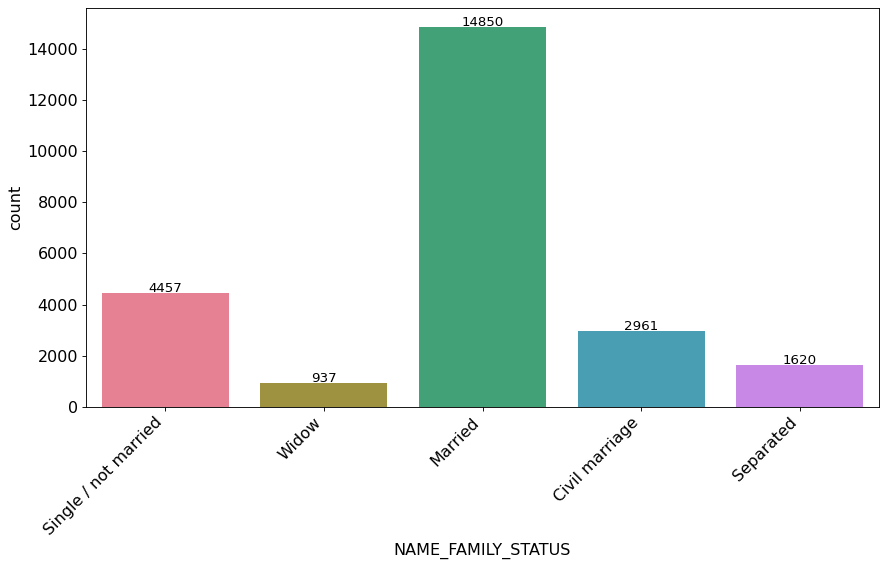

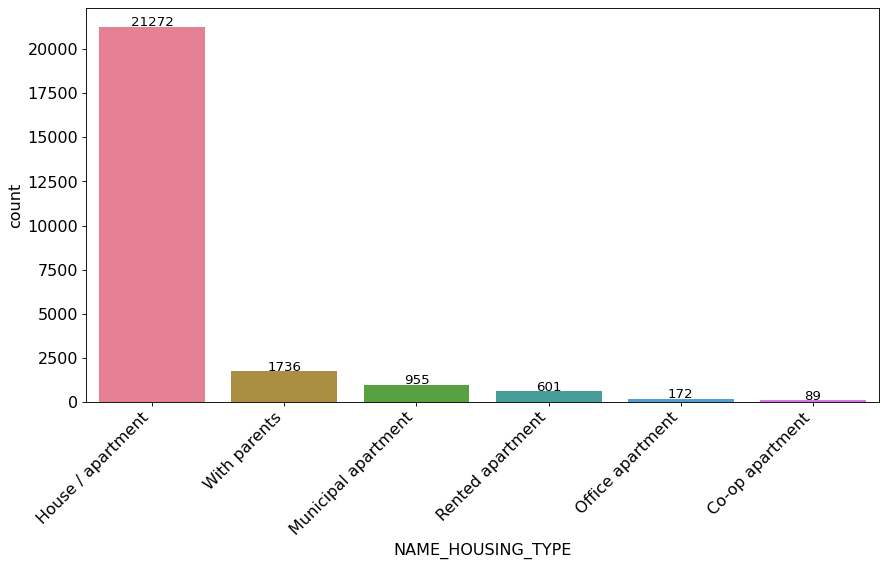

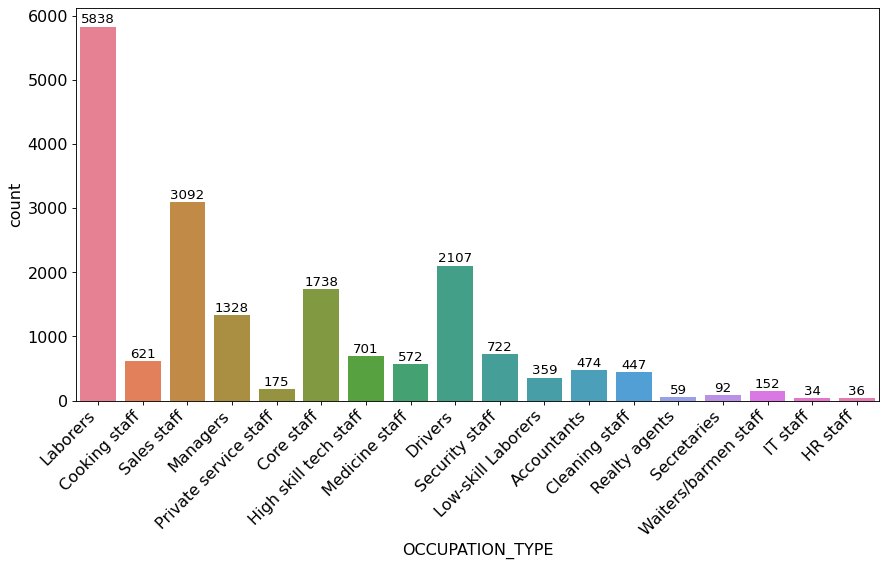

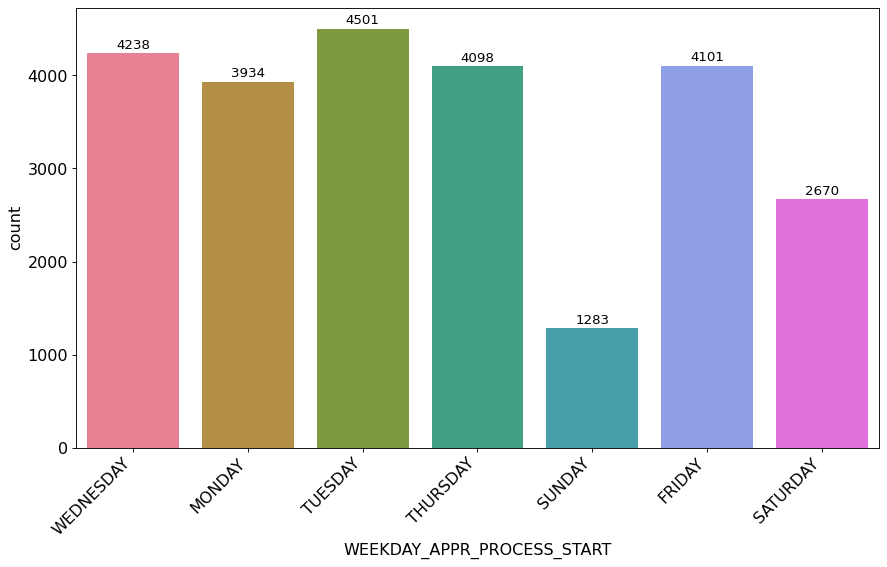

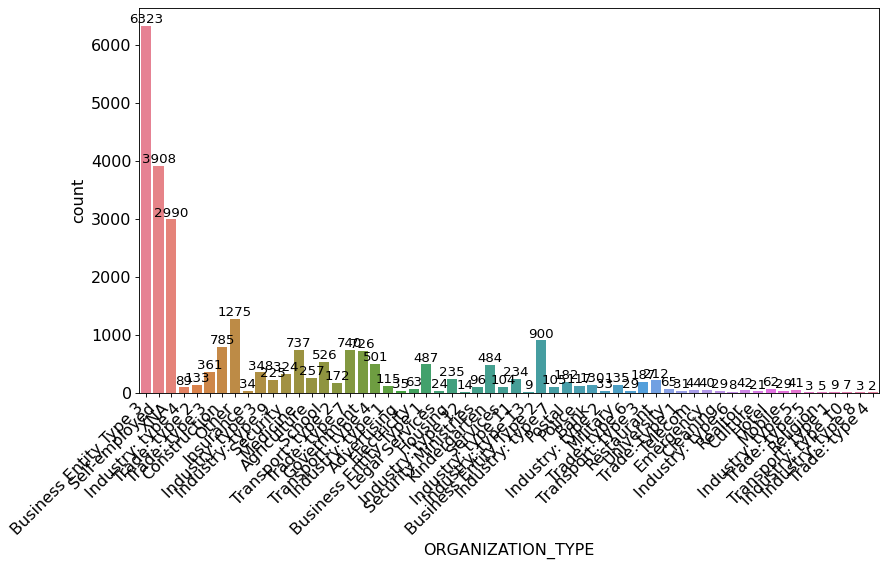

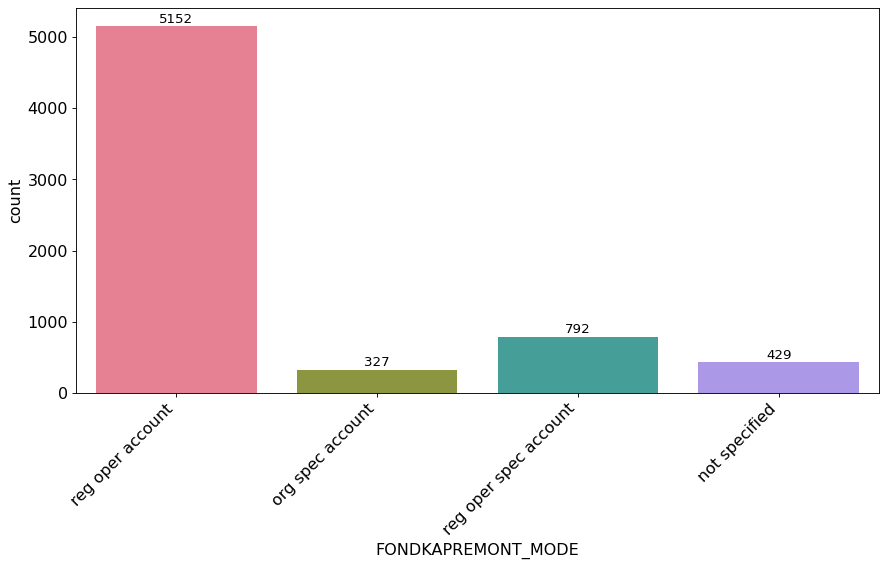

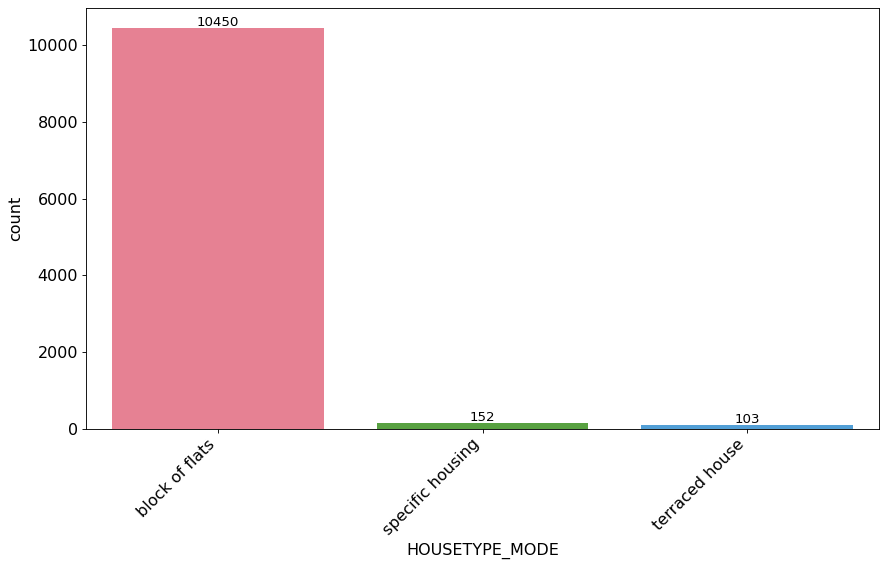

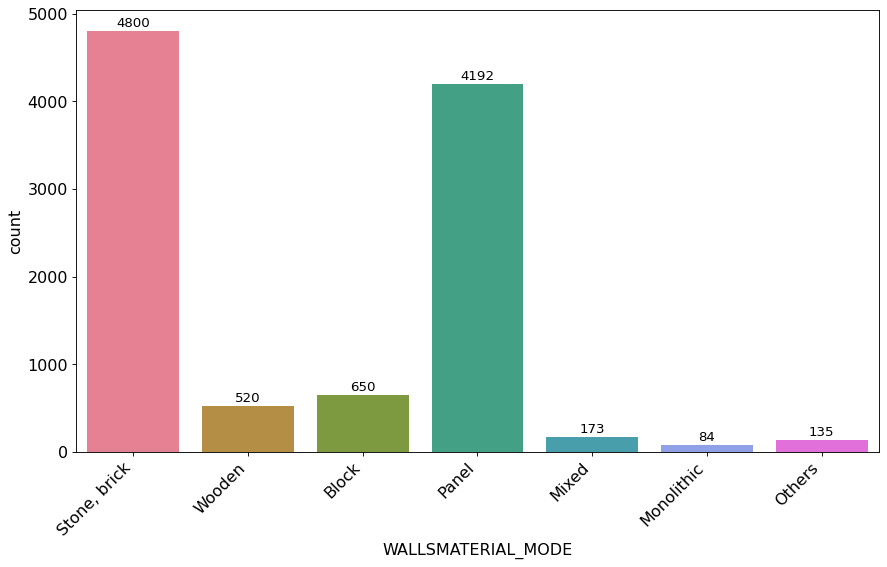

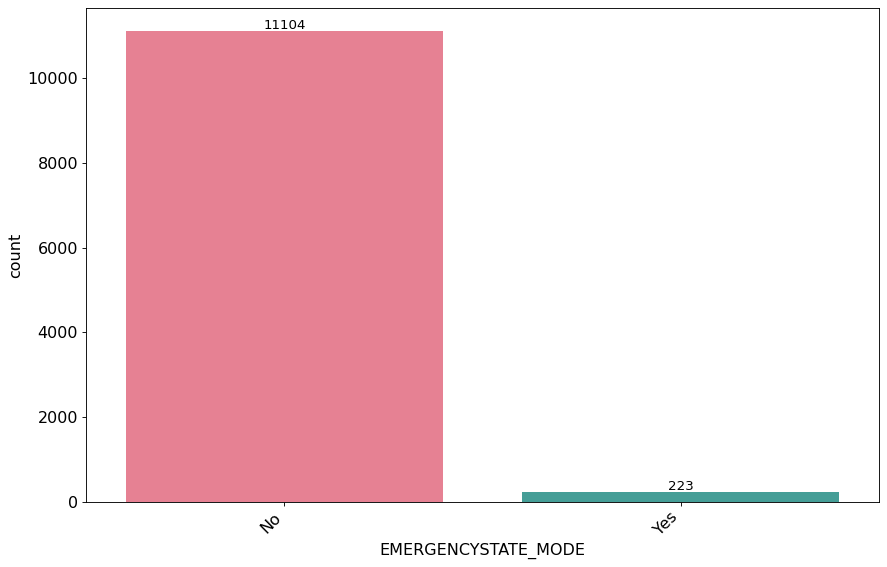

In [205]:
cat_target1 = train_target1.select_dtypes(include = ['object'])
values = {}
lists =[]
for col in train_cat:
    plt.figure(figsize=(12,8), dpi=80)
    plt.xticks(rotation=45, ha='right')
    ax = sns.countplot(data=cat_target1,x=col, palette='husl')
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+50), ha='center', fontsize =12)
        lists.append(p.get_height())
    values[col]=lists
    lists=[]
    plt.tight_layout(pad=4);
   

Hasil Analisa secara umum:
1. Menyederhanakan NAME_INCOME_TYPE, NAME_HOUSING_TYPE, Ocupation_type <br>
2. Hapus: Name_Housing_Type, ORGANIZATION_TYPE <br>
3. Pelaku credit umumnya dilakukan oleh kaum wanita <br>
4. Credit berbentuk Cash Loan paling banyak <br>
5. Umumnya customer sudah menikah <br>
6. Pengajuan credit paling banyak dilakukan di hari Senin-Kamis, dan menurun jumlah pengajuan kredit saat weekend (Jumat-Minggu)

## Pembagian kelompok berdasarkan Target

---



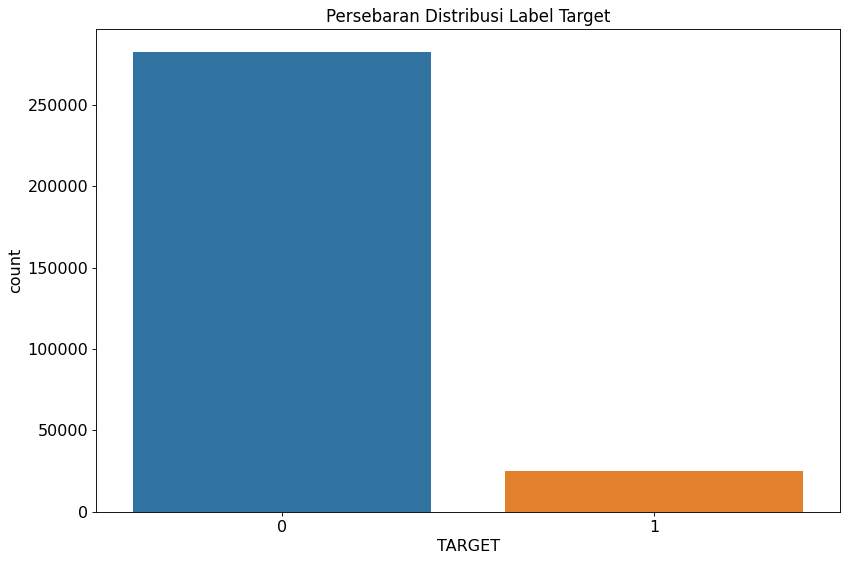

In [206]:
plt.figure(figsize=(12,8), dpi=80)
sns.countplot(x='TARGET', data= train)
plt.title('Persebaran Distribusi Label Target', fontsize=15);

distribusi target imbalance dengan didominasi target 0 (Good Debtor Label)

# G. Feature Selection

## I. Invertigasi Data Kategorik terhadap Target

###**Seperti apa persebaran Gender di setiap Label?**

Text(0.5, 0, 'target 1')

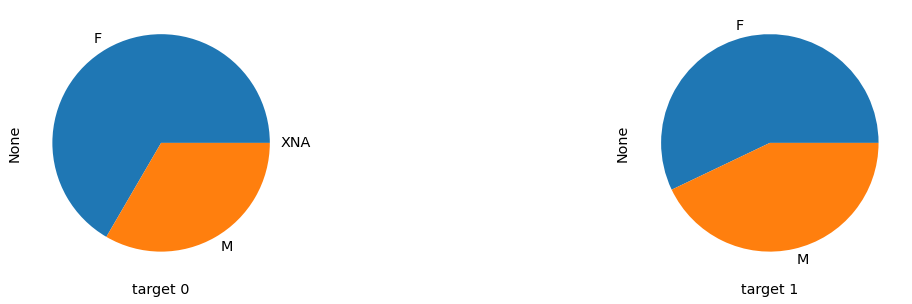

In [207]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
train.loc[train["TARGET"]==0, "CODE_GENDER"].reset_index().groupby("CODE_GENDER").size().plot(kind="pie", ax=ax1)
train.loc[train["TARGET"]==1, "CODE_GENDER"].reset_index().groupby("CODE_GENDER").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 0")
ax2.set_xlabel("target 1")
# plt.savefig('gender.png')


###**Bagaimana Persebaran CONTRACT TYPE terhadap Target?**

Text(0.5, 0, 'target 1')

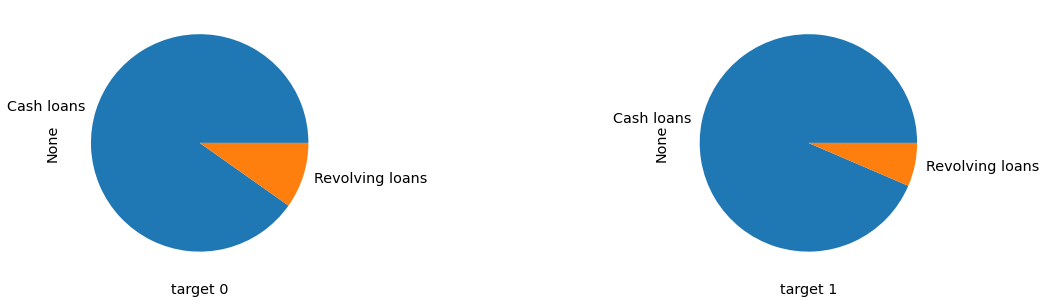

In [208]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
train.loc[train["TARGET"]==0, "NAME_CONTRACT_TYPE"].reset_index().groupby("NAME_CONTRACT_TYPE").size().plot(kind="pie", ax=ax1)
train.loc[train["TARGET"]==1, "NAME_CONTRACT_TYPE"].reset_index().groupby("NAME_CONTRACT_TYPE").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 0")
ax2.set_xlabel("target 1")

Perbandingan Revolving Loans pada kedua Target cukup berbeda, <br>
dimana Target 1 (BAD DEBTOR) cenderung lebih sedikit dibandingkan Target 0 (GOOD DEBTOR)

###**Bagaimana Persebaran GOOD/BAD DEBTOR dalam kepemilikan Mobil?**

Text(0.5, 0, 'target 1')

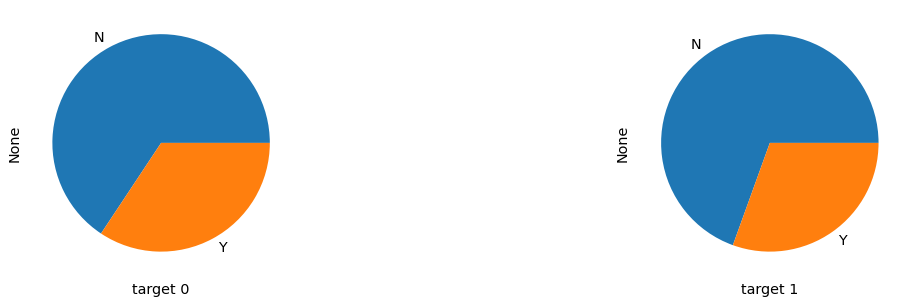

In [209]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
train.loc[train["TARGET"]==0, "FLAG_OWN_CAR"].reset_index().groupby("FLAG_OWN_CAR").size().plot(kind="pie", ax=ax1)
train.loc[train["TARGET"]==1, "FLAG_OWN_CAR"].reset_index().groupby("FLAG_OWN_CAR").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 0")
ax2.set_xlabel("target 1")


Tidak terdapat perbedaan yang signifikan, <bR>Kepemilikan mobil tidak mempengaruhi terhdap target

###**Bagaimana Persebaran sumber pendapatan terhadap Target?**

Text(0.5, 0, 'target 1')

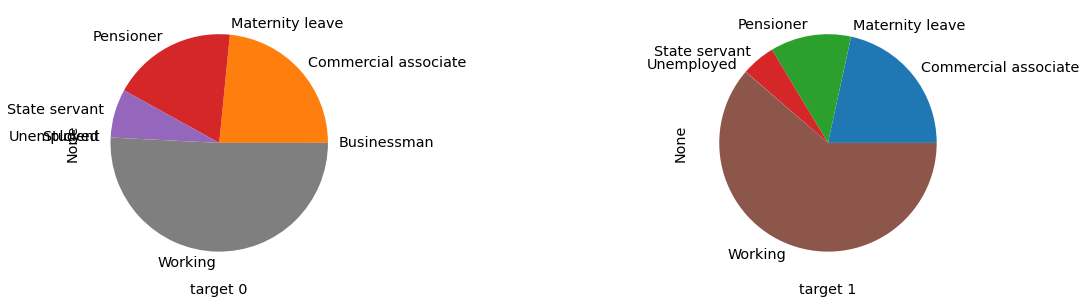

In [210]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
train.loc[train["TARGET"]==0, "NAME_INCOME_TYPE"].reset_index().groupby("NAME_INCOME_TYPE").size().plot(kind="pie", ax=ax1)
train.loc[train["TARGET"]==1, "NAME_INCOME_TYPE"].reset_index().groupby("NAME_INCOME_TYPE").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 0")
ax2.set_xlabel("target 1")

Cukup berbeda sumber pendapatan dari Target 0 dan Target 1

###**Bagaimana Persebaran Pendidikan terhadap Target?**

Text(0.5, 0, 'target 1')

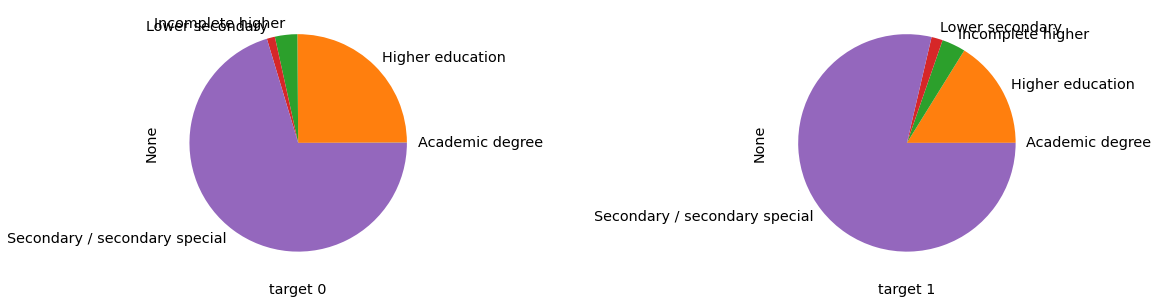

In [211]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
train.loc[train["TARGET"]==0, "NAME_EDUCATION_TYPE"].reset_index().groupby("NAME_EDUCATION_TYPE").size().plot(kind="pie", ax=ax1)
train.loc[train["TARGET"]==1, "NAME_EDUCATION_TYPE"].reset_index().groupby("NAME_EDUCATION_TYPE").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 0")
ax2.set_xlabel("target 1")

Persebaran pendidikan pada Traget 0 dan Target 1 Cukup berebda, <br>
Tampaknya Pendidikan cukup mempengaruhi target

###**Bagaimana Persebaran Status Perkawinan terhadap Target?**

Text(0.5, 0, 'target 1')

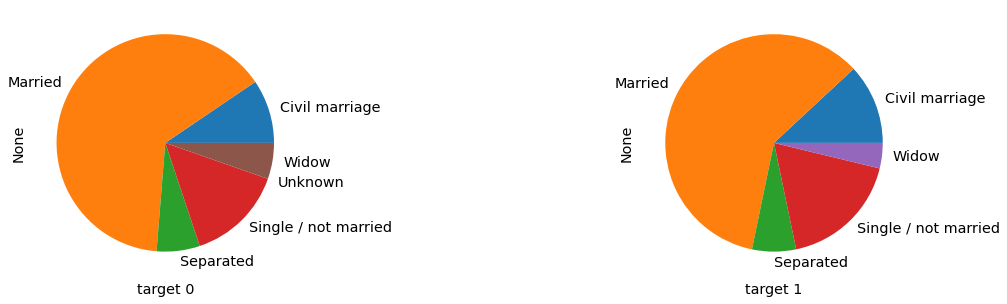

In [212]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
train.loc[train["TARGET"]==0, "NAME_FAMILY_STATUS"].reset_index().groupby("NAME_FAMILY_STATUS").size().plot(kind="pie", ax=ax1)
train.loc[train["TARGET"]==1, "NAME_FAMILY_STATUS"].reset_index().groupby("NAME_FAMILY_STATUS").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 0")
ax2.set_xlabel("target 1")

Persebaran Status Pernikahan diantara kedua Target tidak jauh  berbeda

###**Bagaimana Persebaran Hari Proses Pengajuan Credit terhadap Target?**

Text(0.5, 0, 'target 1')

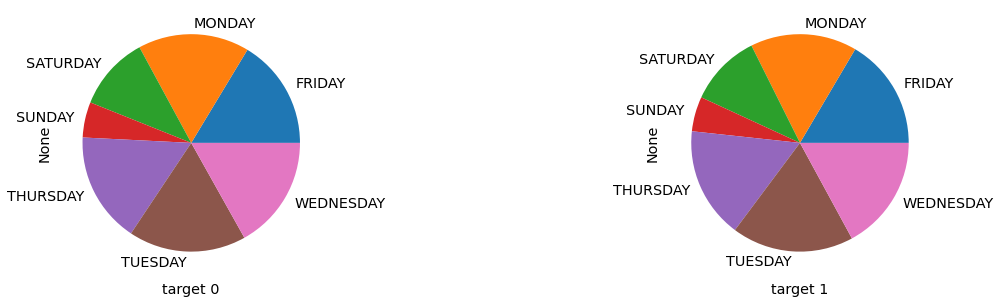

In [213]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
train.loc[train["TARGET"]==0, "WEEKDAY_APPR_PROCESS_START"].reset_index().groupby("WEEKDAY_APPR_PROCESS_START").size().plot(kind="pie", ax=ax1)
train.loc[train["TARGET"]==1, "WEEKDAY_APPR_PROCESS_START"].reset_index().groupby("WEEKDAY_APPR_PROCESS_START").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 0")
ax2.set_xlabel("target 1")

Perbandingan Hari terlihat kedua terget tampak sama, sehinggatidak mempengaruhi terhadap nilai target 

##**KESIMPULAN I**<br>
Berdasarkan Grafik-grafik diatas bahwa feature-feature yang cukup mmeberikan pengaruh terhap nilai target adalah **CODE_GENDER**, **NAME_CONTRACT_TYPE**, **FLAG_OWN_CAR**, **NAME_INCOME_TYPE**, dan **NAME_EDUCATION_TYPE**

##II. Investigasi Data Nuremik terhadap Target

In [214]:
corrs = train.corr()['TARGET'].sort_values()

print('Most Postive Correlations:\n', corrs[corrs>0.05])
print('\nMost Negative Correlations:\n', corrs[corrs<-0.05])

Most Postive Correlations:
 REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3   -0.178919
EXT_SOURCE_2   -0.160472
EXT_SOURCE_1   -0.155317
Name: TARGET, dtype: float64


##**KESIMPULAN II**<br>
Seleksi feature numerik yang memiliki nilai kolerasi dengan target di atas 0.05 atau di bawah -0.05

In [215]:
train_selected = train[['TARGET','REG_CITY_NOT_WORK_CITY','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY','DAYS_BIRTH','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1', 
                        'CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']]
train_selected.head()
                             

,TARGET,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CODE_GENDER,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE
0,1,0,-2120,-1134.0,2,2,-9461,0.139376,0.262949,0.083037,M,Cash loans,N,Working,Secondary / secondary special
1,0,0,-291,-828.0,1,1,-16765,NaN,0.622246,0.311267,F,Cash loans,N,State servant,Higher education
2,0,0,-2531,-815.0,2,2,-19046,0.729567,0.555912,NaN,M,Revolving loans,Y,Working,Secondary / secondary special
3,0,0,-2437,-617.0,2,2,-19005,NaN,0.650442,NaN,F,Cash loans,N,Working,Secondary / secondary special
4,0,1,-3458,-1106.0,2,2,-19932,NaN,0.322738,NaN,M,Cash loans,N,Working,Secondary / secondary special


In [216]:
test_selected = test[['REG_CITY_NOT_WORK_CITY','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY','DAYS_BIRTH','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1', 
                        'CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']]
test_selected.head()

,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CODE_GENDER,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE
0,0,-812,-1740.0,2,2,-19241,0.159520,0.789654,0.752614,F,Cash loans,N,Working,Higher education
1,0,-1623,0.0,2,2,-18064,0.432962,0.291656,0.564990,M,Cash loans,N,Working,Secondary / secondary special
2,0,-3503,-856.0,2,2,-20038,0.610991,0.699787,NaN,M,Cash loans,Y,Working,Higher education
3,0,-4208,-1805.0,2,2,-13976,0.612704,0.509677,0.525734,F,Cash loans,N,Working,Secondary / secondary special
4,1,-4262,-821.0,2,2,-13040,NaN,0.425687,0.202145,M,Cash loans,Y,Working,Secondary / secondary special


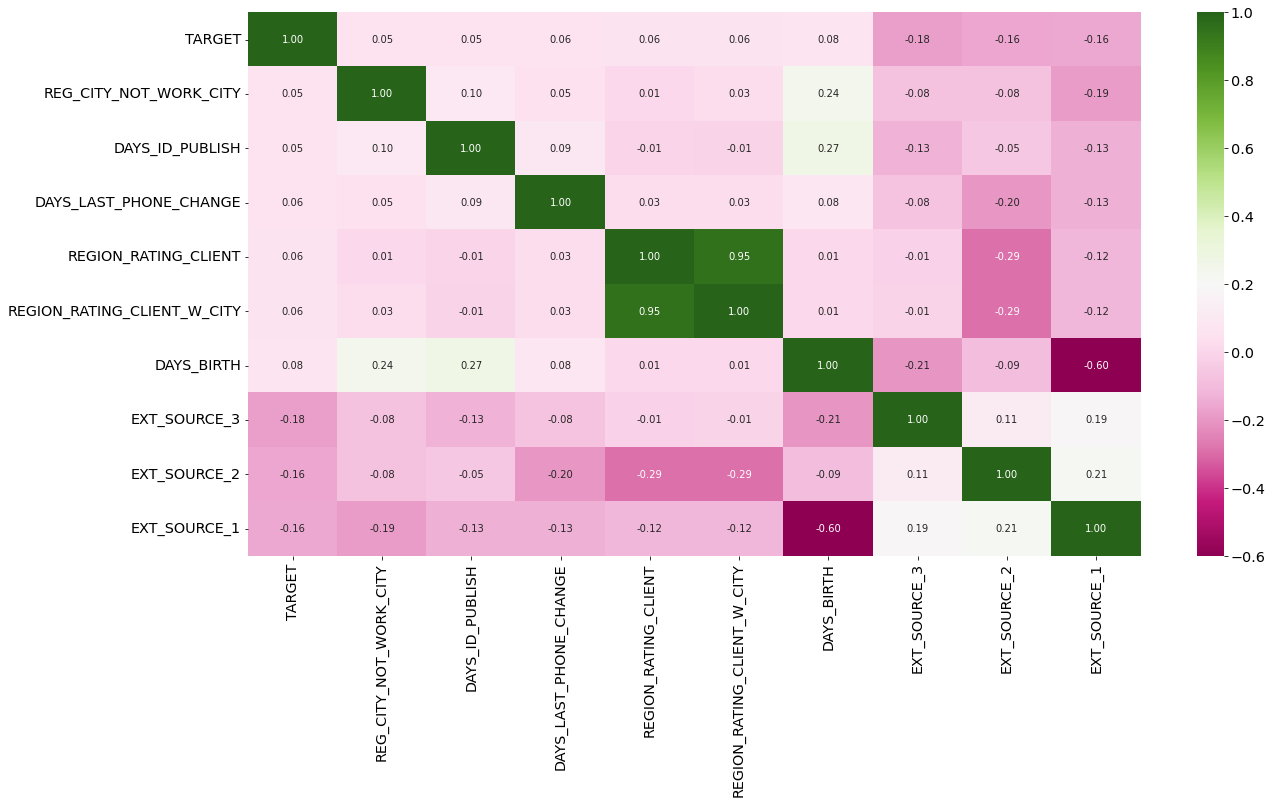

In [217]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_selected.corr(), cmap='PiYG', annot=True, fmt='.2f')
plt.savefig('Multivariate.png')

# H. Duplicate & Missing Values

In [218]:
train_selected.duplicated().any()

False

In [219]:
display(train_selected.shape)

(307511, 15)

In [220]:
def missing_describe(data):
    total_missing = data.isnull().sum().sort_values(ascending=False)
    total_missing = total_missing[total_missing.values != 0]
    per= np.round((100*total_missing.values/len(data)),2)
    dataframe = pd.DataFrame(total_missing, columns=['number_of_missing_values'])
    return (dataframe.assign(percentage=per))

In [221]:
print('Jumlah Kolom Train yang terdapat Missing Value:',missing_describe(train_selected).percentage.count())
print('Jumlah Kolom Test yang terdapat Missing Value:', missing_describe(test_selected).percentage.count())
missing_value = pd.merge (missing_describe(train_selected).reset_index(), missing_describe(test_selected).reset_index(),
                          how= 'outer', on = ['index'])
missing_value

Jumlah Kolom Train yang terdapat Missing Value: 4
Jumlah Kolom Test yang terdapat Missing Value: 3


,index,number_of_missing_values_x,percentage_x,number_of_missing_values_y,percentage_y
0,EXT_SOURCE_1,173378,56.38,20532.0,42.12
1,EXT_SOURCE_3,60965,19.83,8668.0,17.78
2,EXT_SOURCE_2,660,0.21,8.0,0.02
3,DAYS_LAST_PHONE_CHANGE,1,0.00,NaN,NaN


In [222]:
#Impute kolom diatas 5% dengan rata-ratanya
train_selected['EXT_SOURCE_1'].fillna(train_selected['EXT_SOURCE_1'].mean(), inplace=True)
train_selected['EXT_SOURCE_3'].fillna(train_selected['EXT_SOURCE_3'].mean(), inplace=True)

#drop missing value yang persentase < 5%
drop_row = ['EXT_SOURCE_2','DAYS_LAST_PHONE_CHANGE']
for i in drop_row:
  train_selected = train_selected[train_selected[i].notnull()]
  test_selected = test_selected[test_selected[i].notnull()]

jumlah_drop_train = train.shape[0]-train_selected.shape[0]
jumlah_drop_test = test.shape[0]-test_selected.shape[0]

print('Banyak baris data train yang didrop =', jumlah_drop_train, 'baris = ', round(100*jumlah_drop_train/train.shape[0],2),'%')
print('Banyak baris data test yang didrop =', jumlah_drop_test, 'baris = ', round(100*jumlah_drop_test/test.shape[0],2),'%')


Banyak baris data train yang didrop = 660 baris =  0.21 %
Banyak baris data test yang didrop = 8 baris =  0.02 %


In [223]:
missing_describe(train_selected)

,number_of_missing_values,percentage


# I. Feature Engineer

In [224]:
train_selected['DAYS_LAST_PHONE_CHANGE']= train_selected['DAYS_LAST_PHONE_CHANGE']/-365
train_selected['DAYS_BIRTH']= train_selected['DAYS_BIRTH']/-365
train_selected['DAYS_ID_PUBLISH']= train_selected['DAYS_ID_PUBLISH']/-365

test_selected['DAYS_LAST_PHONE_CHANGE']= test_selected['DAYS_LAST_PHONE_CHANGE']/-365
test_selected['DAYS_BIRTH']= test_selected['DAYS_BIRTH']/-365
test_selected['DAYS_ID_PUBLISH']= test_selected['DAYS_ID_PUBLISH']/-365


In [225]:
train_selected.head()

,TARGET,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CODE_GENDER,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE
0,1,0,5.808219,3.106849,2,2,25.920548,0.139376,0.262949,0.083037,M,Cash loans,N,Working,Secondary / secondary special
1,0,0,0.797260,2.268493,1,1,45.931507,0.510853,0.622246,0.311267,F,Cash loans,N,State servant,Higher education
2,0,0,6.934247,2.232877,2,2,52.180822,0.729567,0.555912,0.502130,M,Revolving loans,Y,Working,Secondary / secondary special
3,0,0,6.676712,1.690411,2,2,52.068493,0.510853,0.650442,0.502130,F,Cash loans,N,Working,Secondary / secondary special
4,0,1,9.473973,3.030137,2,2,54.608219,0.510853,0.322738,0.502130,M,Cash loans,N,Working,Secondary / secondary special


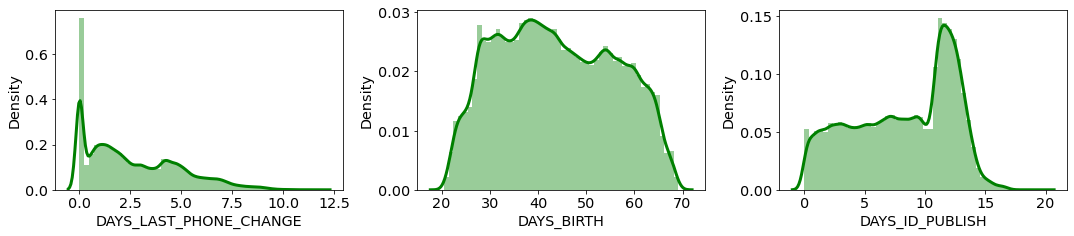

In [226]:

feature=['DAYS_LAST_PHONE_CHANGE','DAYS_BIRTH','DAYS_ID_PUBLISH' ]
plt.figure(figsize=(15, 6))
for i in range(0, len(feature)):
    plt.subplot(2, len(feature), i+1)
    sns.distplot(x=train_selected[feature[i]], color='green')
    plt.xlabel(feature[i])
    plt.tight_layout(pad=1)
# plt.savefig('univariate.png')

In [227]:
# Label Encoding
mapping_CODE_GENDER = {
    'F' : 1,
    'M':0,
    'XNA': 2
}

mapping_FLAG_OWN_CAR = {
    'Y' : 1,
    'N':0
}

mapping_NAME_CONTRACT_TYPE = {
    'Cash loans' : 1,
    'Revolving loans':0
}


train_selected['CODE_GENDER'] = train_selected['CODE_GENDER'].map(mapping_CODE_GENDER)
train_selected['FLAG_OWN_CAR'] = train_selected['FLAG_OWN_CAR'].map(mapping_FLAG_OWN_CAR)
train_selected['NAME_CONTRACT_TYPE'] = train_selected['NAME_CONTRACT_TYPE'].map(mapping_NAME_CONTRACT_TYPE)

test_selected['CODE_GENDER'] = test_selected['CODE_GENDER'].map(mapping_CODE_GENDER)
test_selected['FLAG_OWN_CAR'] = test_selected['FLAG_OWN_CAR'].map(mapping_FLAG_OWN_CAR)
test_selected['NAME_CONTRACT_TYPE'] = test_selected['NAME_CONTRACT_TYPE'].map(mapping_NAME_CONTRACT_TYPE)

#One Hot Encoding
for i in ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']:
    onehots = pd.get_dummies(train_selected[i], prefix=i)
    train_selected = train_selected.join(onehots)
    test_selected = test_selected.join(onehots)

#Hapus kolom yang outdated
train_selected.drop(['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'], axis=1, inplace=True)
test_selected.drop(['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'], axis=1, inplace=True)

In [228]:
train_selected.head(10)

,TARGET,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CODE_GENDER,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,1,0,5.808219,3.106849,2,2,25.920548,0.139376,0.262949,0.083037,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0.797260,2.268493,1,1,45.931507,0.510853,0.622246,0.311267,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,6.934247,2.232877,2,2,52.180822,0.729567,0.555912,0.502130,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,6.676712,1.690411,2,2,52.068493,0.510853,0.650442,0.502130,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,1,9.473973,3.030137,2,2,54.608219,0.510853,0.322738,0.502130,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,0,0,1.306849,6.947945,2,2,46.413699,0.621226,0.354225,0.502130,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,0,0,1.695890,4.279452,2,2,37.747945,0.492060,0.724000,0.774761,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0
7,0,1,6.517808,2.931507,3,3,51.643836,0.540654,0.714279,0.502130,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0
8,0,0,9.627397,-0.000000,2,2,55.065753,0.751724,0.205747,0.587334,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
9,0,0,10.936986,4.583562,2,2,39.641096,0.510853,0.746644,0.502130,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


#J. TRAIN-TEST DATA

In [229]:
X = train_selected.drop('TARGET', axis=1)
y = train_selected['TARGET']

# print(X_test.shape)

#Train-Test Split Data (70%:30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(306851, 25)
(214795, 25)
(92056, 25)


In [230]:
#Menggunakan Scaling Data
minmax_scaler = MinMaxScaler()
X_train = minmax_scaler.fit_transform(X_train)
X_test= minmax_scaler.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [231]:
X_train.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
12170,0.0,0.653467,0.522600,0.5,0.5,0.425592,0.569037,0.600325,0.373346,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
158115,0.0,0.605530,0.195946,0.5,0.5,0.881962,0.765906,0.708969,0.514238,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
200911,0.0,0.013617,0.153308,0.0,0.0,0.315614,0.569889,0.768035,0.514238,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30743,0.0,0.077671,0.083411,1.0,1.0,0.022322,0.569889,0.722573,0.419533,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
96471,0.0,0.244129,0.374884,0.5,0.0,0.801973,0.758934,0.529533,0.864047,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


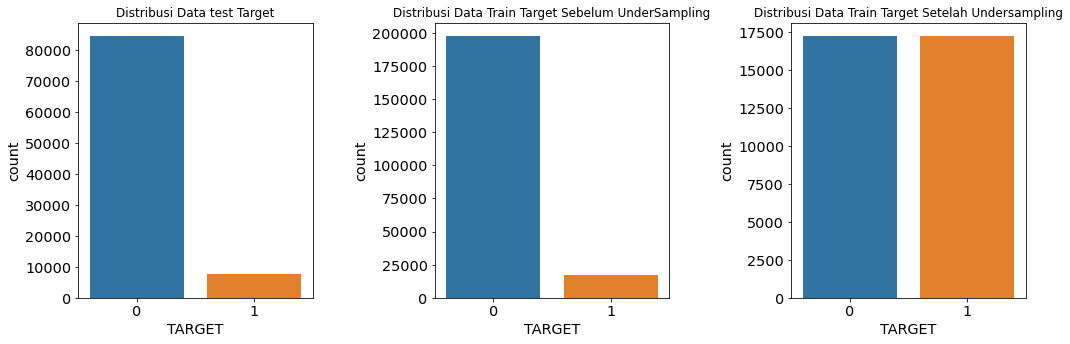

In [232]:
# X_SMOTE, y_SMOTE= over_sampling.SMOTE(random_state=42).fit_resample(X_train, y_train)

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_under,y_under = rus.fit_resample(X_train,y_train)

# from imblearn.over_sampling import SVMSMOTE
# svm_smote = SVMSMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
# X_svm, y_svm = svm_smote.fit_resample(X_train,y_train)


fig, ax = plt.subplots(1,3,figsize=(15, 5))
sns.countplot(y_test, ax=ax[0]);
ax[0].set_title('Distribusi Data test Target');
sns.countplot(y_train, ax=ax[1]);
ax[1].set_title('Distribusi Data Train Target Sebelum UnderSampling');
sns.countplot(y_under, ax=ax[2]);
ax[2].set_title('Distribusi Data Train Target Setelah Undersampling');
fig.tight_layout(pad=1.5);


# K. MODELLING

In [233]:
X_train = X_under.copy()
y_train = y_under.copy() 

def evaluate(model, X_test, y_test,X_train, y_train):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    print("Acuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Acuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

In [234]:
models=[LogisticRegression(random_state = 42),GradientBoostingClassifier(random_state=42), XGBClassifier(random_state=42)]
model_names=['LogisticRegression','GradientBoostingClassifier', 'XGBClassifier']

for model in range(len(models)):
  print('\n\nDengan menggunakan model', model_names[model])
  clf=models[model]
  clf.fit(X_train,y_train)
  evaluate(clf, X_test, y_test,X_train, y_train)



Dengan menggunakan model LogisticRegression
Acuracy (Train Set): 0.68
Acuracy (Test Set): 0.68
Precision (Train Set): 0.68
Precision (Test Set): 0.16
Recall (Train Set): 0.67
Recall (Test Set): 0.67
F1-Score (Train Set): 0.67
F1-Score (Test Set): 0.25
AUC (train-proba): 0.74
AUC (test-proba): 0.74


Dengan menggunakan model GradientBoostingClassifier
Acuracy (Train Set): 0.69
Acuracy (Test Set): 0.68
Precision (Train Set): 0.69
Precision (Test Set): 0.16
Recall (Train Set): 0.68
Recall (Test Set): 0.68
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.26
AUC (train-proba): 0.76
AUC (test-proba): 0.74


Dengan menggunakan model XGBClassifier
Acuracy (Train Set): 0.69
Acuracy (Test Set): 0.68
Precision (Train Set): 0.69
Precision (Test Set): 0.16
Recall (Train Set): 0.68
Recall (Test Set): 0.68
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.26
AUC (train-proba): 0.75
AUC (test-proba): 0.74


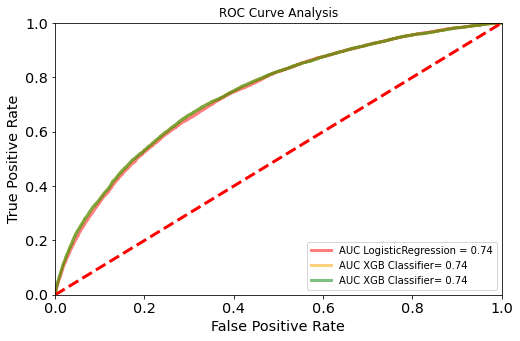

In [235]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

probs_1 = xgb.predict_proba(X_test)
preds_1 = probs_1[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test, preds_1)
roc_auc1 = metrics.auc(fpr1, tpr1)

logres = LogisticRegression(random_state=42)
logres.fit(X_train, y_train)

probs_2 = logres.predict_proba(X_test)
preds_2 = probs_2[:,1]
fpr2, tpr2, threshold = metrics.roc_curve(y_test, preds_2)
roc_auc2 = metrics.auc(fpr2, tpr2)

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

probs_3 = xgb.predict_proba(X_test)
preds_3 = probs_3[:,1]
fpr3, tpr3, threshold = metrics.roc_curve(y_test, preds_3)
roc_auc3 = metrics.auc(fpr3, tpr3)


plt.title('ROC Curve Analysis')
plt.plot(fpr2, tpr2, 'g', label = 'AUC LogisticRegression = %0.2f' % roc_auc2, color='red', alpha = 0.5)
plt.plot(fpr3, tpr3, 'g', label = 'AUC XGB Classifier= %0.2f' % roc_auc3, color='orange', alpha = 0.5)
plt.plot(fpr1, tpr1, 'g', label = 'AUC XGB Classifier= %0.2f' % roc_auc1, color= 'green', alpha = 0.5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [236]:
def experiment(X_train,X_test,y_train,y_test):
    
    result = defaultdict(list)
    
    logreg = LogisticRegression(random_state=42)
    grad = GradientBoostingClassifier(random_state=42)
    xgb = XGBClassifier(random_state=42)
    
    
    
    list_model = [('Logistic Regression',logreg),
                  ('Gradient Boosting',grad),
                  ('XGB Classfier', xgb)
                  ]
    
    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()
        
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        y_pred_proba_train = model.predict_proba(X_train)
        y_pred_proba = model.predict_proba(X_test)
        
        accuracy_test = accuracy_score(y_test,y_pred)
        accuracy_train = accuracy_score(y_train,y_pred_train)
        recall_test = recall_score(y_test,y_pred)
        recall_train = recall_score(y_train,y_pred_train)
        precision_test = precision_score(y_test,y_pred)
        precision_train = precision_score(y_train,y_pred_train)
        f1_score_train = f1_score(y_train, y_pred_train)
        f1_score_test = f1_score(y_test, y_pred)
        auc_train = roc_auc_score(y_train, y_pred_proba_train[:, 1])
        auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy (test)'].append(accuracy_test)
        result['accuracy (train)'].append(accuracy_train)
        result['recall (test)'].append(recall_test)
        result['recall (train)'].append(recall_train)
        result['precision (test)'].append(precision_test)
        result['precision (train)'].append(precision_train)
        result['f1_score (test)'].append(f1_score_test)
        result['f1_score (train)'].append(f1_score_train)
        result['auc (test)'].append(auc_test)
        result['auc (train)'].append(auc_train)
        result['duration'].append(duration)
        
    return result

In [237]:
result = experiment(X_train,X_test,y_train,y_test)
result = pd.DataFrame(result)

In [238]:
result

,model_name,model,accuracy (test),accuracy (train),recall (test),recall (train),precision (test),precision (train),f1_score (test),f1_score (train),auc (test),auc (train),duration
0,Logistic Regression,LogisticRegression(random_state=42),0.679065,0.675587,0.668571,0.666802,0.156879,0.678727,0.254128,0.672712,0.736441,0.736722,0.623559
1,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.676653,0.686228,0.683183,0.684372,0.158129,0.686922,0.256816,0.685645,0.740914,0.755609,7.554298
2,XGB Classfier,XGBClassifier(random_state=42),0.677761,0.685677,0.684777,0.684952,0.158879,0.685947,0.257918,0.685449,0.741031,0.754817,2.873533


[[57237 27291]
 [ 2373  5155]]


Text(20.0, 0.5, 'Truth')

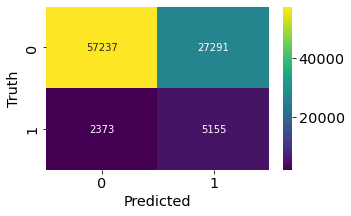

In [239]:
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
plt.figure(figsize = (5,3))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')
# plt.savefig('cm.png')

#L. Hyperparameter Tunning

In [240]:
param_grid = { 
    'learning_rate':[0.01,0.15],
    'n_estimators': [600,750,800],
    'max_features': [ 'sqrt'],
    'max_depth' : [8,9,10]
}

param_grid = {'learning_rate':[0.01,0.001], 'max_depth' : [8,9,10]}

In [241]:
from sklearn.model_selection import GridSearchCV
CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 5,n_jobs = 1)
CV_xgb.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=42), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.001],
                         'max_depth': [8, 9, 10]})

In [242]:
CV_xgb.best_params_

{'learning_rate': 0.01, 'max_depth': 9}

In [243]:
# List of hyperparameter
hyperparameters = dict(learning_rate = [0.01], 
                       max_depth = [9]
                      )

# Inisialisasi Model
xgb_tunned = XGBClassifier(random_state=42)
clf = GridSearchCV(xgb_tunned, hyperparameters, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)

# Predict & Evaluation
y_pred = clf.predict(X_test)#Check performa dari model
evaluate(clf, X_test, y_test,X_train, y_train)

Acuracy (Train Set): 0.73
Acuracy (Test Set): 0.67
Precision (Train Set): 0.73
Precision (Test Set): 0.15
Recall (Train Set): 0.74
Recall (Test Set): 0.68
F1-Score (Train Set): 0.73
F1-Score (Test Set): 0.25
AUC (train-proba): 0.81
AUC (test-proba): 0.73


Hasil Hyperparameter tunning menurunkan nilai AUC Score dimana sebelum dituning score AUC adalah 0.74

Text(0.5, 1.0, 'feature importance score')

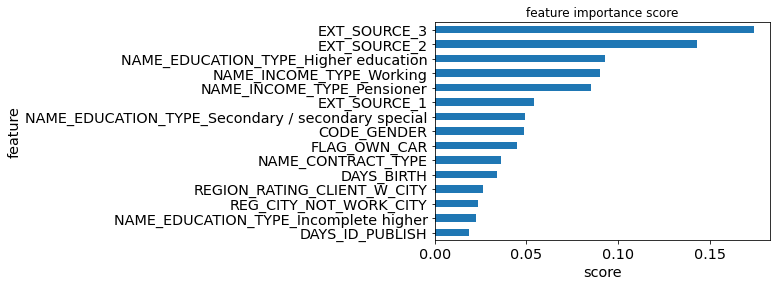

In [244]:
feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(15).plot(kind='barh', figsize=(6, 4))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

#REMODELLING PADA DATA TEST

In [245]:
test_selected

,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CODE_GENDER,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,0,2.224658,4.767123,2,2,52.715068,0.159520,0.789654,0.752614,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,4.446575,-0.000000,2,2,49.490411,0.432962,0.291656,0.564990,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,9.597260,2.345205,2,2,54.898630,0.610991,0.699787,NaN,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,11.528767,4.945205,2,2,38.290411,0.612704,0.509677,0.525734,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,11.676712,2.249315,2,2,35.726027,NaN,0.425687,0.202145,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,9.312329,1.873973,3,3,54.712329,0.643026,0.648575,NaN,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48740,1,8.227397,-0.000000,2,2,30.646575,NaN,0.684596,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
48741,0,4.120548,2.295890,2,2,43.621918,0.283712,0.632770,0.733503,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48742,1,3.736986,6.323288,2,2,38.268493,0.595456,0.445701,0.373090,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [246]:
x_test = test_selected
x_test= minmax_scaler.transform(x_test)
x_test = pd.DataFrame(x_test)

Y_pred = xgb.predict(x_test)
Y_pred_proba_test = xgb.predict_proba(x_test)



In [247]:
df_prediction_prob = pd.DataFrame(Y_pred_proba_test, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(xgb.predict(x_test), columns = ['predicted_TARGET'])

df=pd.concat([df_prediction_prob, df_prediction_target], axis=1)
df.sort_values(by=['prob_0'],  ascending=[False],inplace=True)

In [248]:
df

,prob_0,prob_1,predicted_TARGET
23227,0.954037,0.045963,0
46942,0.951171,0.048829,0
32320,0.949716,0.050284,0
14461,0.944757,0.055243,0
31889,0.942331,0.057669,0
...,...,...,...
3204,0.044952,0.955048,1
40713,0.044931,0.955069,1
36829,0.043627,0.956373,1
12016,0.041051,0.958949,1


In [249]:
print('Banyak pelanggan yang terprediksi BAD DEBTOR sebanyak pada application = ', df[df['predicted_TARGET']==1].shape[0] , 'atau sebanyak', round((100*(df[df['predicted_TARGET']==1].shape[0])/len(df)),2), '%',
      'dan banyaknya pelanggan yang dikategorikan sebagain GOOD DEBTOR adalah', df[df['predicted_TARGET']==0].shape[0], 'atau sebanyak ', round((100*(df[df['predicted_TARGET']==0].shape[0])/len(df)),2), '%')

Banyak pelanggan yang terprediksi BAD DEBTOR sebanyak pada application =  28970 atau sebanyak 59.44 % dan banyaknya pelanggan yang dikategorikan sebagain GOOD DEBTOR adalah 19766 atau sebanyak  40.56 %


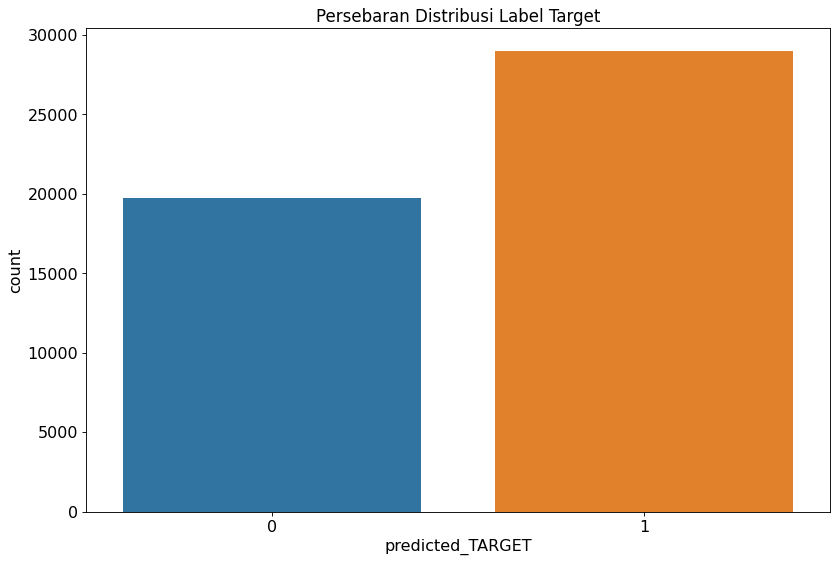

In [250]:
plt.figure(figsize=(12,8), dpi=80)
sns.countplot(x='predicted_TARGET', data= df_prediction_target)
plt.title('Persebaran Distribusi Label Target', fontsize=15);

In [261]:
df_result= pd.merge (df.reset_index(), test_selected.reset_index(),
                          how= 'inner', on = ['index'])
df_result = df_result[['prob_0', 'prob_1','predicted_TARGET','index']]

In [262]:
df_result

,prob_0,prob_1,predicted_TARGET,index
0,0.954037,0.045963,0,23227
1,0.951171,0.048829,0,46942
2,0.949716,0.050284,0,32320
3,0.944757,0.055243,0,14461
4,0.942331,0.057669,0,31889
...,...,...,...,...
48723,0.044952,0.955048,1,3204
48724,0.044931,0.955069,1,40713
48725,0.043627,0.956373,1,36829
48726,0.041051,0.958949,1,12016
